In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
files = {
    "data/2021-bis-2025.csv": "von-2021-bis-2025",
    "data/2020-bis-2024.csv": "von-2020-bis-2024",
    "data/2019-bis-2023.csv": "von-2019-bis-2023",
    "data/2018-bis-2022.csv": "von-2018-bis-2022"
}

In [3]:
# Dataframe preparation
all_data = []

for filename, group in files.items():
    df = pd.read_csv(filename)
    df = df.drop(columns='Student ID', errors='ignore')
    
    df_long = df.melt(var_name='subject', value_name='grade')
    
    df_long['group'] = group
    
    df_long['semester'] = df_long['subject'].str.extract(r'^[a-zA-Z]-[a-zA-Z]-(\d+)-')[0]
    
    df_long['semester'] = pd.to_numeric(df_long['semester'], errors='coerce')
    df_long['grade'] = pd.to_numeric(df_long['grade'], errors='coerce')
    
    all_data.append(df_long)

full_df = pd.concat(all_data, ignore_index=True)

In [4]:
# Calculate the average per semester and per group
avg_grades = full_df.groupby(['group', 'semester'])['grade'].mean().reset_index()

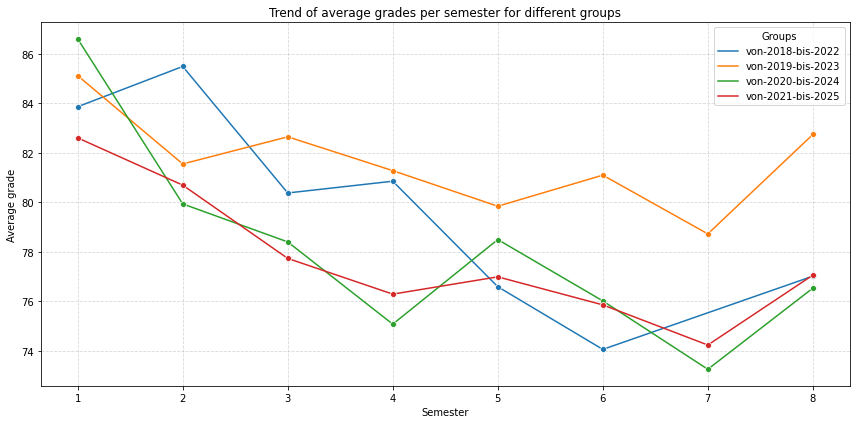

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_grades, x='semester', y='grade', hue='group', marker='o')
plt.title('Trend of average grades per semester for different groups')
plt.xlabel('Semester')
plt.ylabel('Average grade')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Groups')
plt.tight_layout()
plt.show()